In [35]:
from pandas import read_csv
from time import time

import pandas as pd

from imblearn.under_sampling import RandomUnderSampler
from joblib import dump
import matplotlib.pyplot as plt
from pandas import to_datetime
from parse import parse
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mutual_info_score, make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [27]:
dataframe = read_csv('../data/seven_feature_clean_.csv.gz', verbose=False)

In [28]:
dataframe.head(10)

,Unnamed: 0,DayOfTheWeek,MinuteOfTheDay,Latitude,Longitude,ParkingSpaceCount,ParkingTimeLimitCategory,ParkingCategory,AvailableSpace
0,28459351,1,43200,-122.330015,47.616454,7,240.0,1,0
1,22643110,1,43200,-122.321955,47.604256,9,120.0,2,8
2,26832891,1,43200,-122.330488,47.619229,10,120.0,1,4
3,27987115,1,43200,-122.323533,47.612504,8,120.0,2,8
4,28147181,1,43200,-122.323931,47.608905,4,120.0,1,0
5,26799619,1,43200,-122.334813,47.615226,9,240.0,1,2
6,25472274,1,43200,-122.327653,47.606263,7,120.0,1,5
7,28272417,1,43200,-122.339174,47.624465,2,120.0,1,2
8,23203452,1,43200,-122.326102,47.607900,11,120.0,2,9
9,28123646,1,43200,-122.336535,47.623136,4,120.0,1,4


In [53]:
print(dataframe)

         Unnamed: 0  DayOfTheWeek  MinuteOfTheDay    Latitude  Longitude  \
0          28459351             1           43200 -122.330015  47.616454   
1          22643110             1           43200 -122.321955  47.604256   
2          26832891             1           43200 -122.330488  47.619229   
3          27987115             1           43200 -122.323533  47.612504   
4          28147181             1           43200 -122.323931  47.608905   
...             ...           ...             ...         ...        ...   
8910933    19648437             2           79140 -122.325646  47.615801   
8910934    26993283             2           79140 -122.320969  47.619324   
8910935     1662253             2           79140 -122.324585  47.615804   
8910936     5239421             2           79140 -122.320363  47.621941   
8910937    26593552             2           79140 -122.318060  47.615862   

         ParkingSpaceCount  ParkingTimeLimitCategory  ParkingCategory  \
0             

In [42]:
def evaluate_accuracy(model, x_train, y_train, x_test, y_test):
    prediction = model.predict(x_test)
    r_square_score = r2_score(y_test, prediction)
    print('{0} R-Squared: {1}'.format(model.__class__.__name__, r_square_score))
    print('MAE CV:', cross_val_score(model, x_train, y_train, cv=4, scoring=make_scorer(mean_absolute_error)))
    print('MSE CV:', cross_val_score(model, x_train, y_train, cv=4, scoring=make_scorer(mean_squared_error)))
    
    return r_square_score


def gradient_boosting_regression(x_train, x_test, y_train, y_test):
    model = GradientBoostingRegressor(max_depth=16)
    model.fit(x_train, y_train)
    print('feature importance:', model.feature_importances_)
    feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
    feat_importances.plot(kind='barh', figsize=(10, 5))

    r_square_score = evaluate_accuracy(model, x_train, y_train, x_test, y_test)
#     dump(model, str(r_square_score) + '_out_' + TARGET_AREA.replace(' ', '_') + '_gradient_boosting.joblib')


def random_forest_regression(x_train, x_test, y_train, y_test):
    model = RandomForestRegressor(max_depth=20, n_jobs=-1)
    model.fit(x_train, y_train)
    print('feature importance:', model.feature_importances_)
    feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
    feat_importances.plot(kind='barh', figsize=(10, 5))

    r_square_score = evaluate_accuracy(model, x_train, y_train, x_test, y_test)
#     dump(model, str(r_square_score) + '_out_' + TARGET_AREA.replace(' ', '_') + '_random_forest.joblib')


def k_neighbors_regression(x_train, x_test, y_train, y_test):
    model = KNeighborsRegressor(n_neighbors=16)
    model.fit(x_train, y_train)

    r_square_score = evaluate_accuracy(model, x_train, y_train, x_test, y_test)
#     dump(model, str(r_square_score) + '_out_' + TARGET_AREA.replace(' ', '_') + '_k_neighbors.joblib')


def linear_regression(x_train, x_test, y_train, y_test):
    model = LinearRegression()
    model.fit(x_train, y_train)

    r_square_score = evaluate_accuracy(model, x_train, y_train, x_test, y_test)
#     dump(model, str(r_square_score) + '_out_' + TARGET_AREA.replace(' ', '_') + '_linear.joblib')

In [51]:
x_features = ['DayOfTheWeek', 'MinuteOfTheDay', 'Latitude', 'Longitude', 'ParkingSpaceCount', 'ParkingTimeLimitCategory', 'ParkingCategory']
y_feature = 'AvailableSpace'

# prepare training dataset
x, y = dataframe[x_features], dataframe[y_feature]

# under-sampling
random_under_sampler = RandomUnderSampler()
x, y = random_under_sampler.fit_resample(x, y)

print(x)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

# execute model training
# for function in [linear_regression, k_neighbors_regression, random_forest_regression, gradient_boosting_regression]:
#     function(x_train, x_test, y_train, y_test)


plt.figure(figsize=(10,5))


     DayOfTheWeek  MinuteOfTheDay    Latitude  Longitude  ParkingCategory
0               4           43020 -122.329559  47.617717                1
1               1           68220 -122.325839  47.608554                1
2               4           34440 -122.329386  47.628236                1
3               2           46200 -122.333119  47.616531                1
4               4           48060 -122.338383  47.616024                1
..            ...             ...         ...        ...              ...
155             2           28800 -122.318297  47.616969                1
156             5           28800 -122.318297  47.616969                1
157             5           28860 -122.318297  47.616969                1
158             3           28800 -122.318297  47.616969                1
159             1           28800 -122.318297  47.616969                1

[160 rows x 5 columns]


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

feature importance: [0.04724965 0.20243305 0.40832718 0.29709189 0.04489822]
RandomForestRegressor R-Squared: 0.8185623747268755
MAE CV: [4.77333333 5.92037037 4.50925926 4.255     ]
MSE CV: [35.58323333 55.54085185 41.91365926 33.52988077]


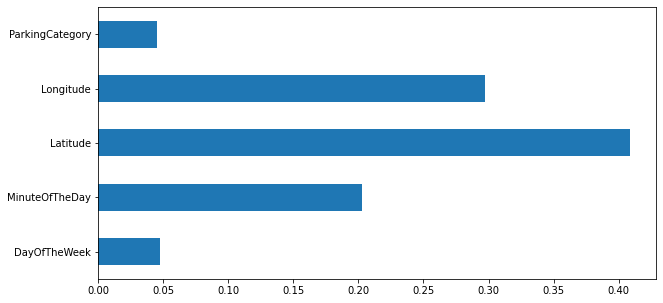

In [52]:
random_forest_regression(x_train, x_test, y_train, y_test)

feature importance: [0.00755679 0.04766897 0.01944516 0.03532521 0.87252636 0.01551142
 0.00196609]
GradientBoostingRegressor R-Squared: 0.8177939933628982
MAE CV: [1.85434477 2.4463088  2.49884292 2.60551595]
MSE CV: [ 7.91390524 13.7654261  18.28104895  9.92063529]


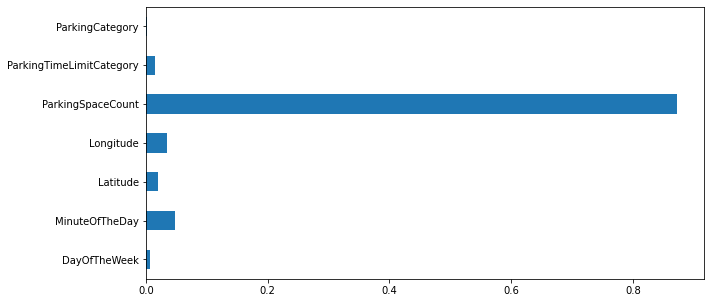

In [47]:
gradient_boosting_regression(x_train, x_test, y_train, y_test)

In [4]:
df.head()

,Unnamed: 0,DayOfTheWeek,MinuteOfTheDay,Latitude,Longitude,ParkingSpaceCount,ParkingTimeLimitCategory,ParkingCategory,AvailableSpace
0,28459351,1,43200,-122.330015,47.616454,7,240.0,1,0
1,22643110,1,43200,-122.321955,47.604256,9,120.0,2,8
2,26832891,1,43200,-122.330488,47.619229,10,120.0,1,4
3,27987115,1,43200,-122.323533,47.612504,8,120.0,2,8
4,28147181,1,43200,-122.323931,47.608905,4,120.0,1,0


In [30]:
df.feature_importance_

AttributeError: 'DataFrame' object has no attribute 'feature_importance_'

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

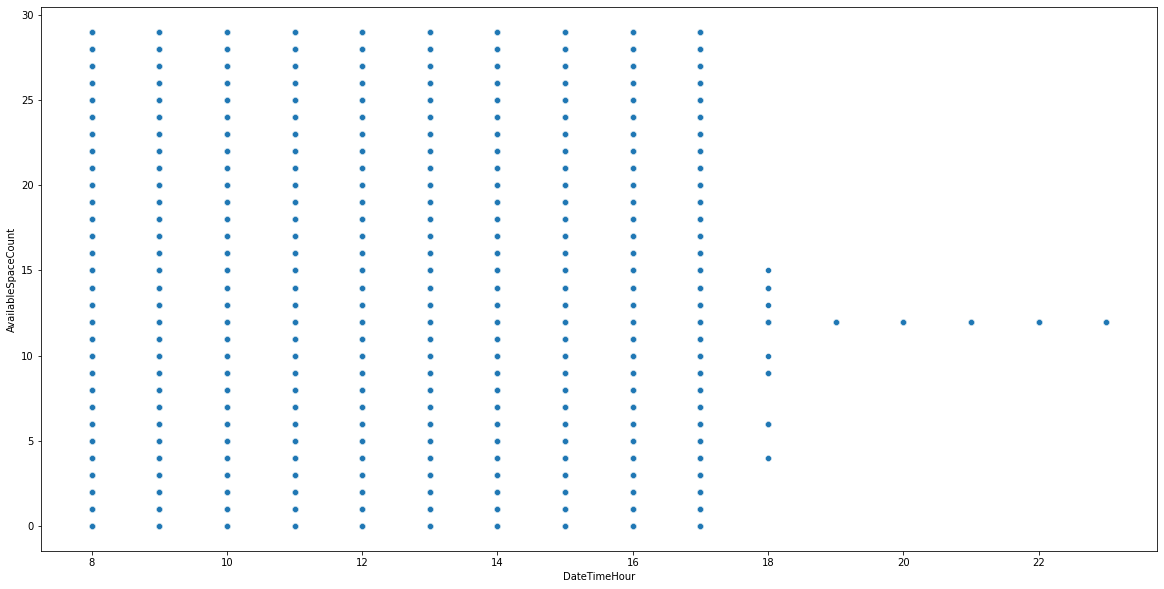

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="DateTimeHour", y="AvailableSpaceCount")
plt.show()
# df.plot.scatter(x='TimeStr', y='AvailableSpaceCount', c='DarkBlue')

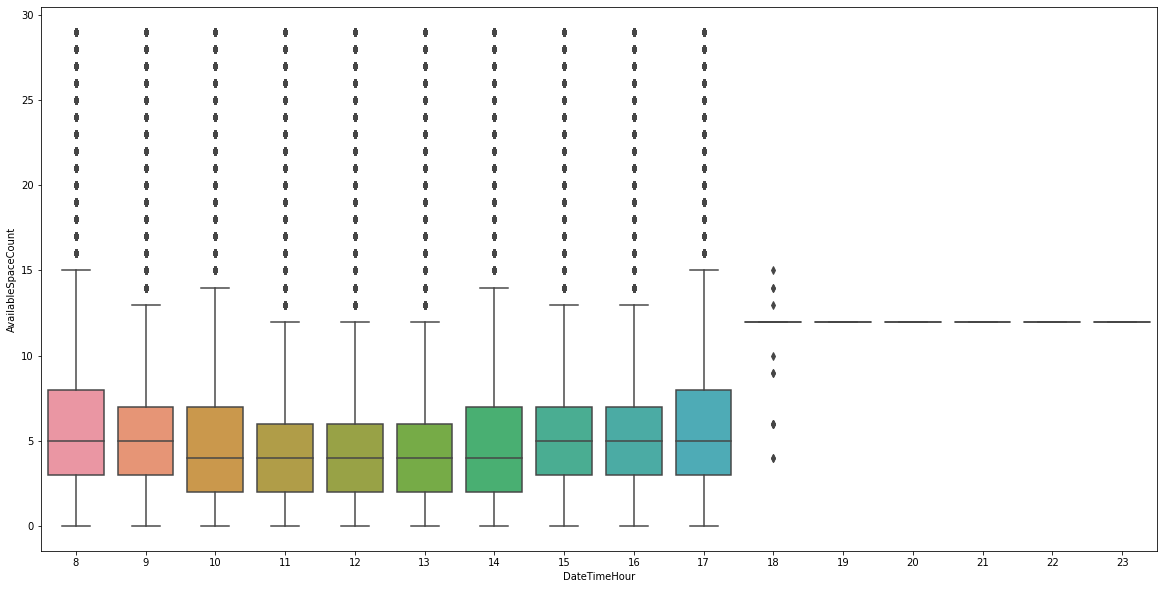

In [27]:
plt.figure(figsize=(20,10))
# plt.ylim(0,600)
sns.boxplot(x='DateTimeHour', y='AvailableSpaceCount', data=df)
plt.show()


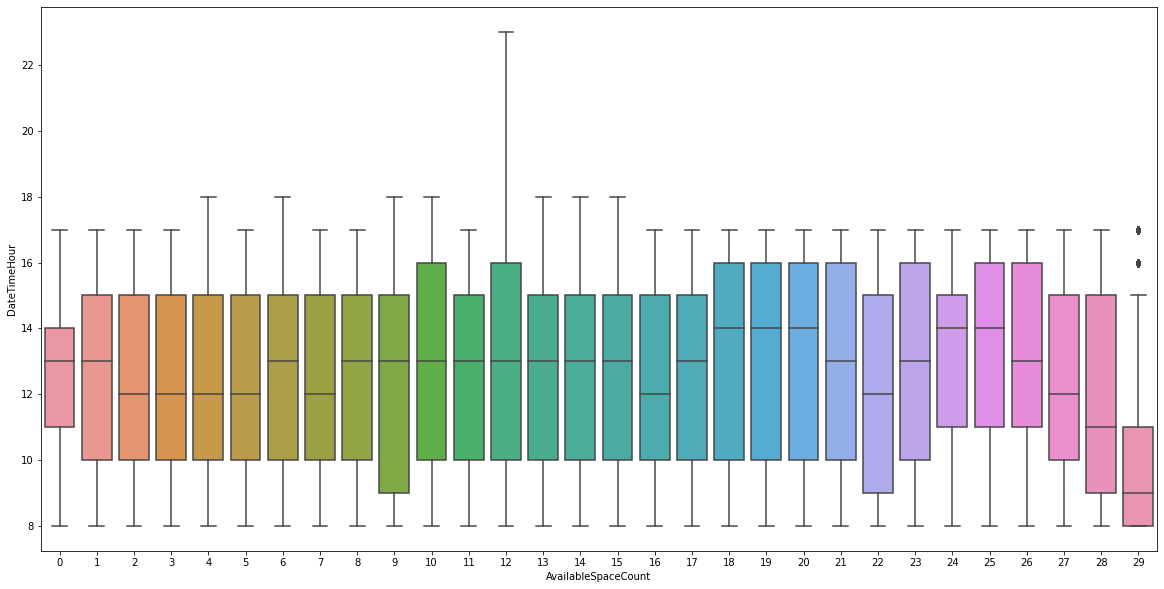

In [28]:
plt.figure(figsize=(20,10))
# plt.ylim(0,600)
sns.boxplot(x='AvailableSpaceCount', y='DateTimeHour', data=df)
plt.show()